#1
Machine learning is making the computer learn by studying data and statistics. When should we use ML to organize data and manipulate it? Suppose you have a data set and want to find an outcome with the data. In that case, you can use machine learning to analyze and learn from the data, leading to predictions and hypotheses, improving decisions, and even deeper analysis of the data. If we have a data set of numbers and letters, we can use machine learning to analyze the data and predict the average or anything else we might need to find. But a situation where we don't use machine learning is when the data set is a small dataset. A small data set can be managed more easily and way faster than machine learning. and if the data is too complex for it to be analyzed, it might be more of a hassle to work with machine learning. Another thing is when the data is low-quality. An example of this is a lot of typing errors, string errors, and missing data errors. machine learning is good for many things and can be used in many different ways, and it is great for clear-cut data to manipulate and work with.

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
cols = ['Name', 'Ticket', 'Cabin']
df = df.drop(cols, axis=1)
df.info
# dropping columns we dont need

<bound method DataFrame.info of      PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
888          889         0       3  female   NaN      1      2  23.4500   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3      

In [90]:
df = df.dropna()
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
885          886         0       3  female  39.0      0      5  29.1250   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3      

In [91]:
dummies = []
cols = ['Pclass','Sex','Embarked']
copy_df1 = pd.DataFrame()
copy_df1.loc[:, 'Pclass'] = df.loc[:, 'Pclass']
copy_df1.loc[:, 'Sex'] = df.loc[:, 'Sex']
copy_df1.loc[:, 'Embarked'] = df.loc[:, 'Embarked']
copy_df1
for col in cols:
    dummies.append(pd.get_dummies(copy_df1[col]))
    # extrCTING PCLASS ETC I CONVERTED THEM INTO DATA FOR LATER THE WE WILL DROP THEM

In [92]:
titanic_dummies = pd.concat(dummies, axis=1)


In [93]:
df = pd.concat((df,titanic_dummies), axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,female,male,C,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,False,False,True,False,True,False,False,True
1,2,1,1,female,38.0,1,0,71.2833,C,True,False,False,True,False,True,False,False
2,3,1,3,female,26.0,0,0,7.9250,S,False,False,True,True,False,False,False,True
3,4,1,1,female,35.0,1,0,53.1000,S,True,False,False,True,False,False,False,True
4,5,0,3,male,35.0,0,0,8.0500,S,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q,False,False,True,True,False,False,True,False
886,887,0,2,male,27.0,0,0,13.0000,S,False,True,False,False,True,False,False,True
887,888,1,1,female,19.0,0,0,30.0000,S,True,False,False,True,False,False,False,True
889,890,1,1,male,26.0,0,0,30.0000,C,True,False,False,False,True,True,False,False


In [94]:
df = df.drop(['Pclass', 'Sex', 'Embarked'], axis=1)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,1,0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True
1,2,1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False
2,3,1,26.0,0,0,7.9250,False,False,True,True,False,False,False,True
3,4,1,35.0,1,0,53.1000,True,False,False,True,False,False,False,True
4,5,0,35.0,0,0,8.0500,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,39.0,0,5,29.1250,False,False,True,True,False,False,True,False
886,887,0,27.0,0,0,13.0000,False,True,False,False,True,False,False,True
887,888,1,19.0,0,0,30.0000,True,False,False,True,False,False,False,True
889,890,1,26.0,0,0,30.0000,True,False,False,False,True,True,False,False


In [95]:
df['Age'] = df['Age'].interpolate()
df.info

<bound method DataFrame.info of      PassengerId  Survived   Age  SibSp  Parch     Fare      1      2      3  \
0              1         0  22.0      1      0   7.2500  False  False   True   
1              2         1  38.0      1      0  71.2833   True  False  False   
2              3         1  26.0      0      0   7.9250  False  False   True   
3              4         1  35.0      1      0  53.1000   True  False  False   
4              5         0  35.0      0      0   8.0500  False  False   True   
..           ...       ...   ...    ...    ...      ...    ...    ...    ...   
885          886         0  39.0      0      5  29.1250  False  False   True   
886          887         0  27.0      0      0  13.0000  False   True  False   
887          888         1  19.0      0      0  30.0000   True  False  False   
889          890         1  26.0      0      0  30.0000   True  False  False   
890          891         0  32.0      0      0   7.7500  False  False   True   

     fe

In [96]:
X = df.values
y = df['Survived'].values

In [97]:
X = np.delete(X, 1, axis=1)

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)

In [99]:
df.head(4)

,PassengerId,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,1,0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True
1,2,1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False
2,3,1,26.0,0,0,7.9250,False,False,True,True,False,False,False,True
3,4,1,35.0,1,0,53.1000,True,False,False,True,False,False,False,True


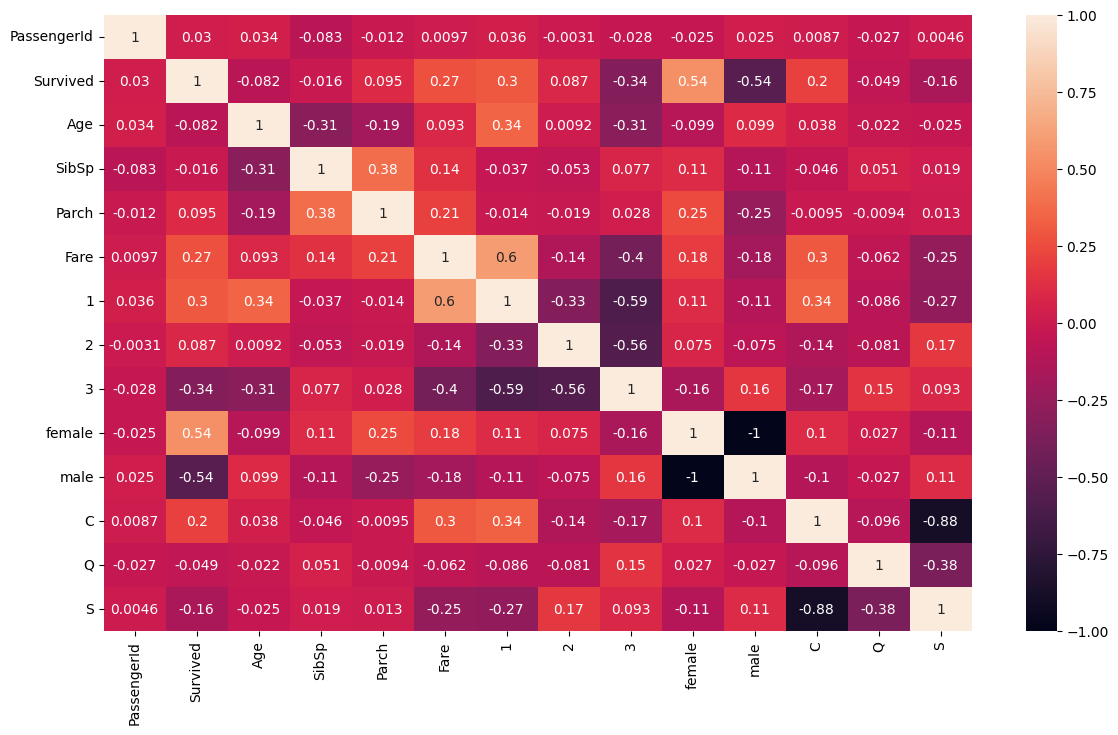

In [100]:
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

the main things to take away from this is that women surved more than men did. the wemon have positive .54 witch means the block will be lightier and will ahve a more positive correlation. there is no corelation between men and weomn so their block is black and -1. thosw who had 1 and survided more than those who had 2.

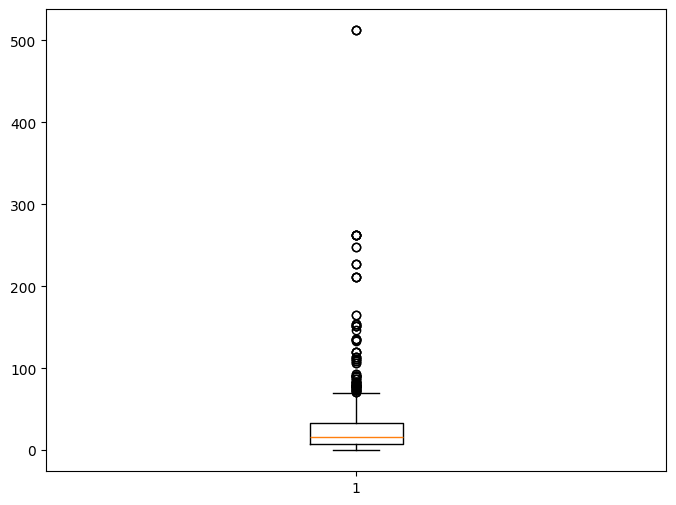

In [101]:
df['Fare'] = df['Fare'].interpolate() # replaces median with num values

plt.figure(figsize = (8,6))
plt.boxplot(df['Fare'])
plt.show()

#fig, axes = plt.subplots(5, 1, figsize=(8,12), sharex=True)
#age_groups = ['Child','Teenager','Adult','Middle-aged','Senior']
##counter = 0
#f#or group in age_groups:
  #  axes[counter].hist(df[df['age_bin_cut'] == group]['Fare'])
 #   axes[counter].set_title(f'fare ranges for {group}')
 #   counter += 1
#plt.show()

In [102]:
df['age_bin_initial'] = df['Age'].apply(lambda x: 'Child' if x <= 12 else          
                'Teenager' if x <= 17 else 
                'Adult' if x <= 34 else 
                'Middle_Adged' if x <= 64 else 
                'Senior')

In [103]:
df['age_bin'] = df['age_bin_initial'].apply(lambda x: x)
print(df[['Age', 'age_bin']].head(10))

     Age       age_bin
0   22.0         Adult
1   38.0  Middle_Adged
2   26.0         Adult
3   35.0  Middle_Adged
4   35.0  Middle_Adged
6   54.0  Middle_Adged
7    2.0         Child
8   27.0         Adult
9   14.0      Teenager
10   4.0         Child


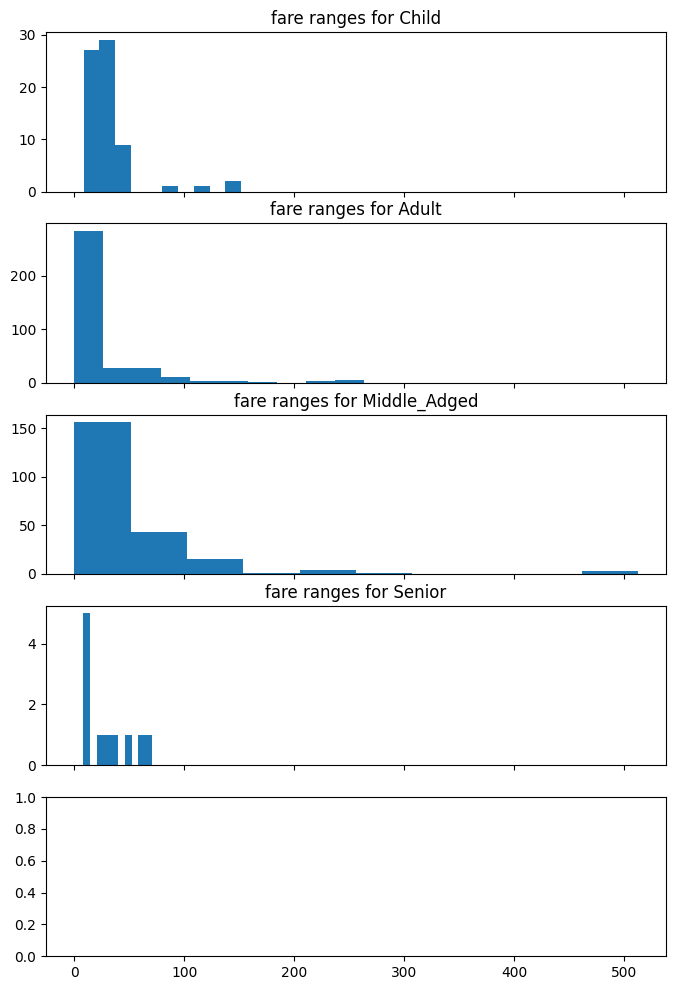

In [104]:
fig, axes = plt.subplots(5, 1, figsize=(8,12), sharex=True)
age_groups = ['Child','Adult','Middle_Adged','Senior']
counter = 0
for group in age_groups:
    axes[counter].hist(df[df['age_bin'] == group]['Fare'])
    axes[counter].set_title(f'fare ranges for {group}')
    counter += 1

the middle adge didnt have to pay very few seniros paid the fair. it was mostly children and adults who went on the titanoc and becuse of the the children and adult charts are alot thicker.

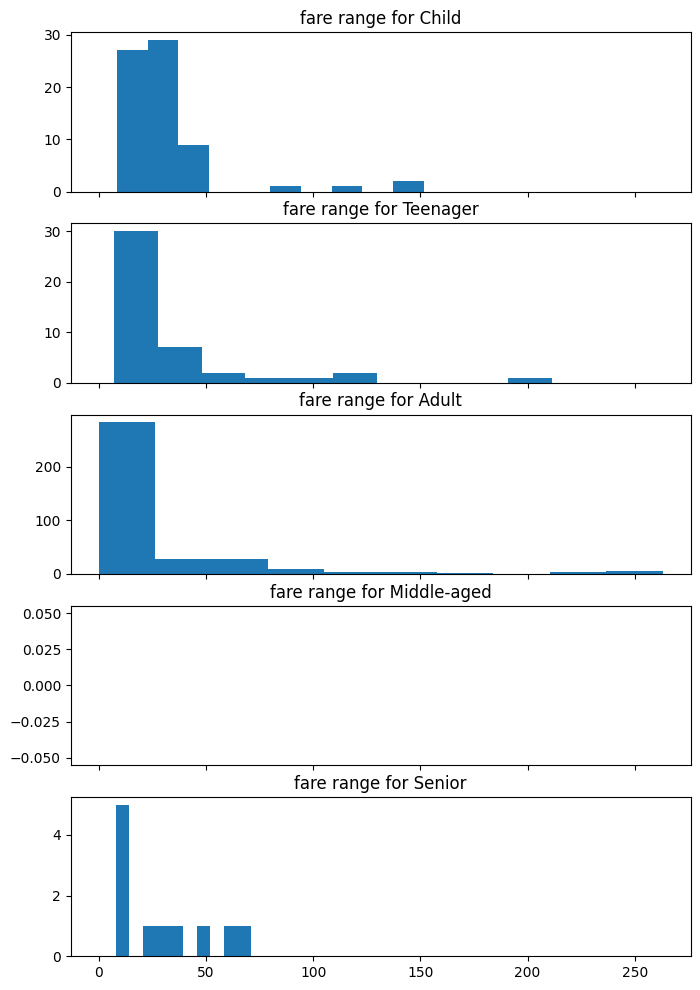

In [112]:
fig, axes = plt.subplots(5, 1, figsize=(8,12), sharex=True)
age_groups = ['Child','Teenager','Adult','Middle-aged','Senior']
counter = 0
for group in age_groups:
    axes[counter].hist(df[df['age_bin'] == group]['Fare'])
    axes[counter].set_title(f'fare range for {group}')
    counter += 1
plt.show()


 buy the end of the sassighnment I came to many different cunclusions one is that women survided more than men sure peoplesaid wemon and children first but by looking at the facts and the data the corelation between those who survied and those who were wemon was very strong. another thing is that based on age their were less seniors on the titanic then their were adults and buy looking at the far it is easy to tell who had majoirty and who paid more. 